In [1]:
import pandas as pd
import statistics

In [2]:
df = pd.read_csv('data/wine_cleared.csv')
display(df.head(1))
#display(df.info())
display(df.describe(exclude='object'))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


,Unnamed: 0,points,price
count,129971.000000,129971.000000,129971.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,39.577066
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,18.000000
50%,64985.000000,88.000000,28.000000
75%,97477.500000,91.000000,40.000000
max,129970.000000,100.000000,3300.000000


In [3]:
from statistics import mean, median, mode
mean(df['price'])
median(df['price'])
print(mode(df['price']))

35.363389129985535


In [4]:
df['price'].mean()
df['price'].median()
df['price'].mode()
df['price'].value_counts().index[0]

np.float64(35.363389129985535)

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.corr(numeric_only=True)

,points,price
points,1.000000,0.402137
price,0.402137,1.000000


###  Давайте проверим наши данные винных обзоров на нормальность, используя метод визуализации.

Для этого воспользуемся пакетом stats статистических распределений и функций, а также знакомой нам библиотекой matplotlib для построения графиков.

Для цены вина:

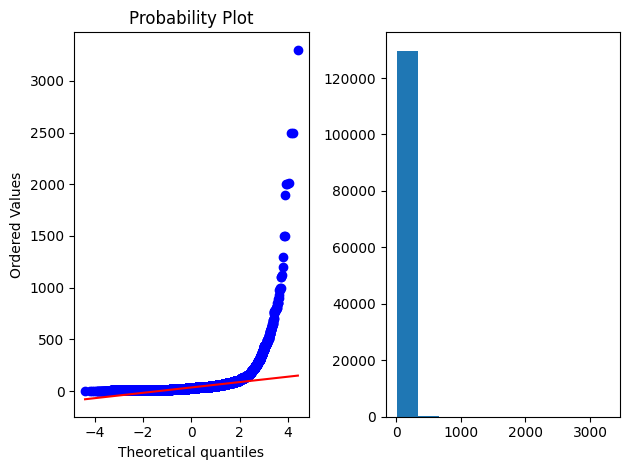

In [7]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

#### Для рейтинга вина


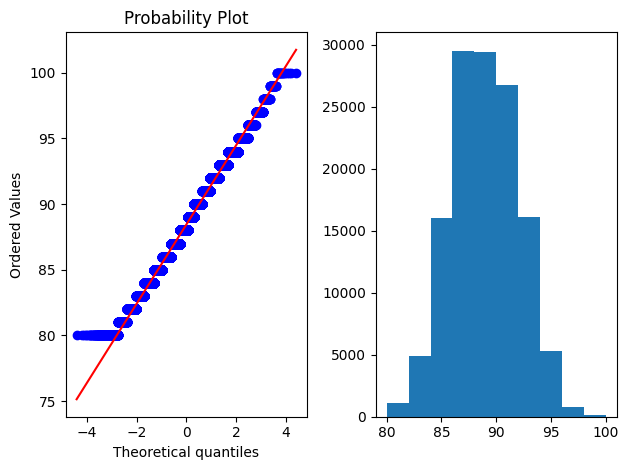

In [8]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

### Рассчитайте коэффициент корреляции Спирмена для признаков point и price. Ответ округлите до сотых.

In [9]:
df.corr(method='spearman',numeric_only=True)

,points,price
points,1.000000,0.581095
price,0.581095,1.000000


### Рассчитайте коэффициент корреляции Кендалла для признаков point и price. Ответ округлите до сотых.

In [10]:
df.corr(method='kendall',numeric_only=True)

,points,price
points,1.000000,0.433498
price,0.433498,1.000000


### Корреляция Мэтьюса

Создадим два случайных признака x, y и зададим им бинарные значения.

In [11]:
from sklearn.metrics import matthews_corrcoef

In [12]:
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

np.float64(-0.3333333333333333)

#  Визуализация корреляций. 

In [13]:
data = pd.read_csv('data/model.csv')

### 1) Матрица корреляций

In [14]:
data.corr(numeric_only=True)

,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
Year,1.000000,0.292518,-0.281576,0.284482,-0.010753,0.025309,0.458945
Waist,0.292518,1.000000,0.283060,0.372637,0.452704,0.136549,0.742284
Hips,-0.281576,0.283060,1.000000,0.228054,0.541836,0.211395,-0.422412
Height,0.284482,0.372637,0.228054,1.000000,0.706569,-0.037934,0.198754
Weight,-0.010753,0.452704,0.541836,0.706569,1.000000,0.212701,0.067543
BMI,0.025309,0.136549,0.211395,-0.037934,0.212701,1.000000,-0.010173
Waist/Hip,0.458945,0.742284,-0.422412,0.198754,0.067543,-0.010173,1.000000


### 2) Тепловая матрица корреляций

In [15]:
import seaborn as sns

<Axes: >

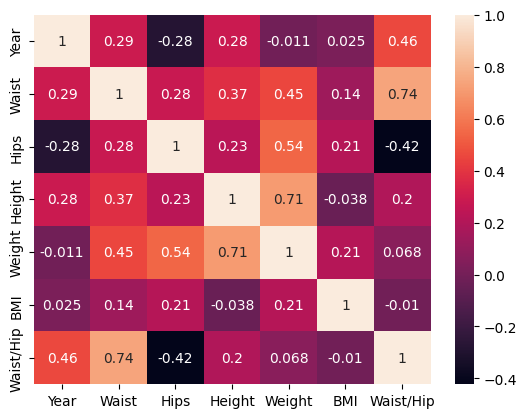

In [16]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

### 3) Точечная диаграмма рассеивания

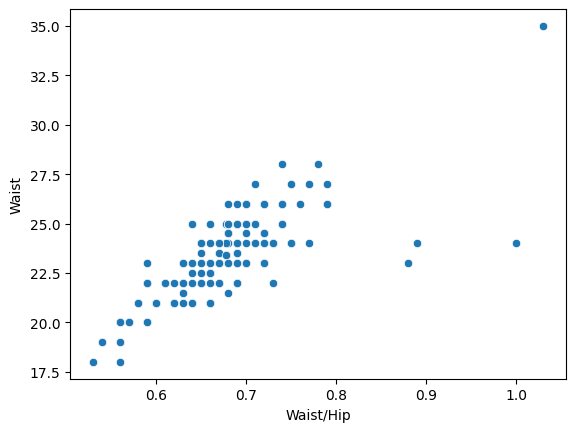

In [17]:
sns.scatterplot(data=data, x="Waist/Hip", y="Waist");

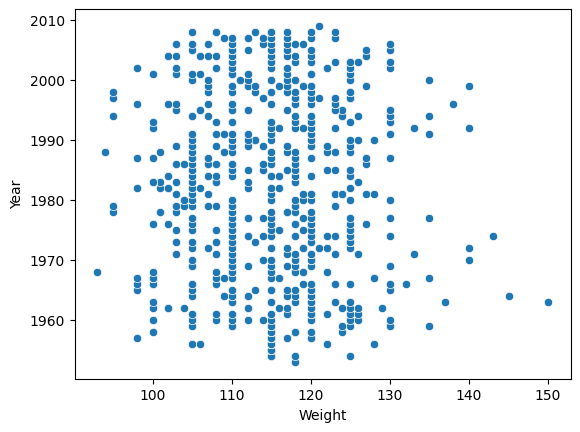

In [18]:
sns.scatterplot(data=data, x="Weight", y="Year");

### 4) График попарных отношений PairPlot

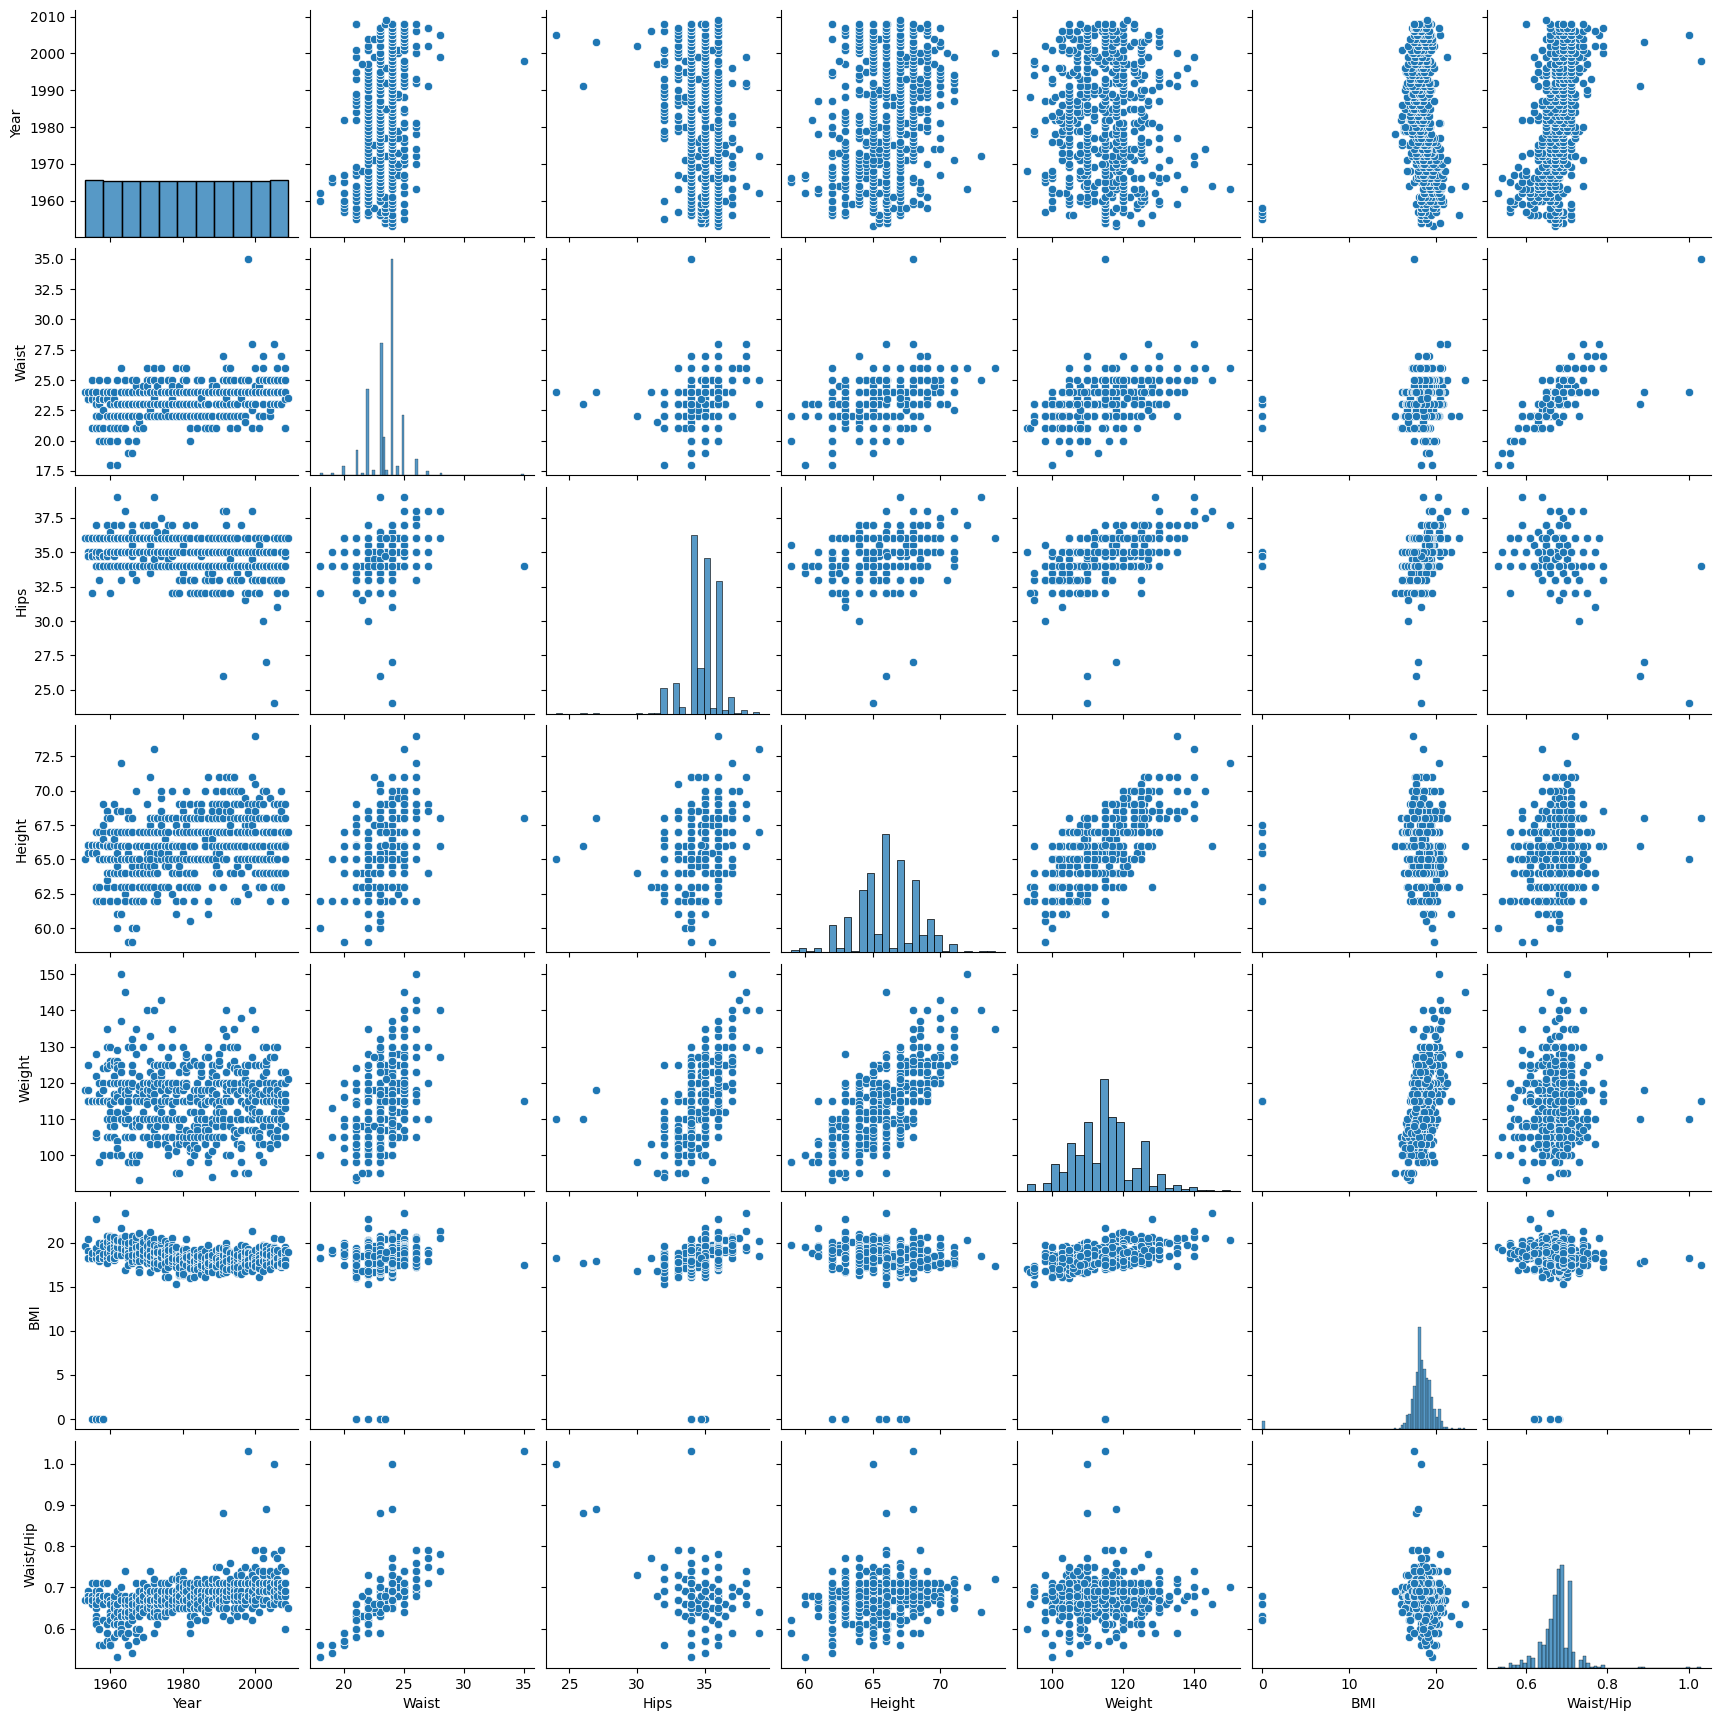

In [19]:
sns.pairplot(data)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      662 non-null    object 
 1   Year       662 non-null    int64  
 2   Waist      662 non-null    float64
 3   Hips       662 non-null    float64
 4   Height     662 non-null    float64
 5   Weight     662 non-null    float64
 6   BMI        662 non-null    float64
 7   Waist/Hip  662 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 41.5+ KB


### Задание 7.2
Рассчитайте среднее значение признаков при помощи библиотеки statistics для признаков weight и height. Ответ округлите до сотых.

In [21]:
import statistics
from statistics import mean
print(round(mean(data['Weight']),2))
print(round(mean(data['Height']),2))

114.94
66.06


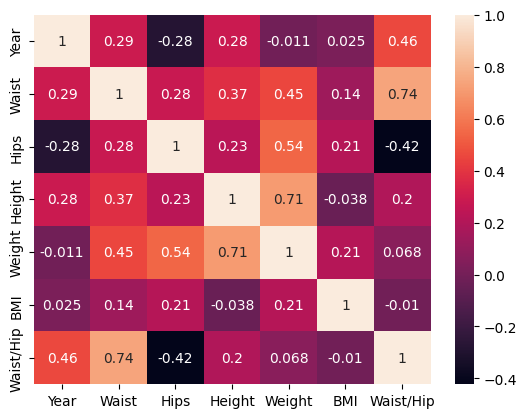

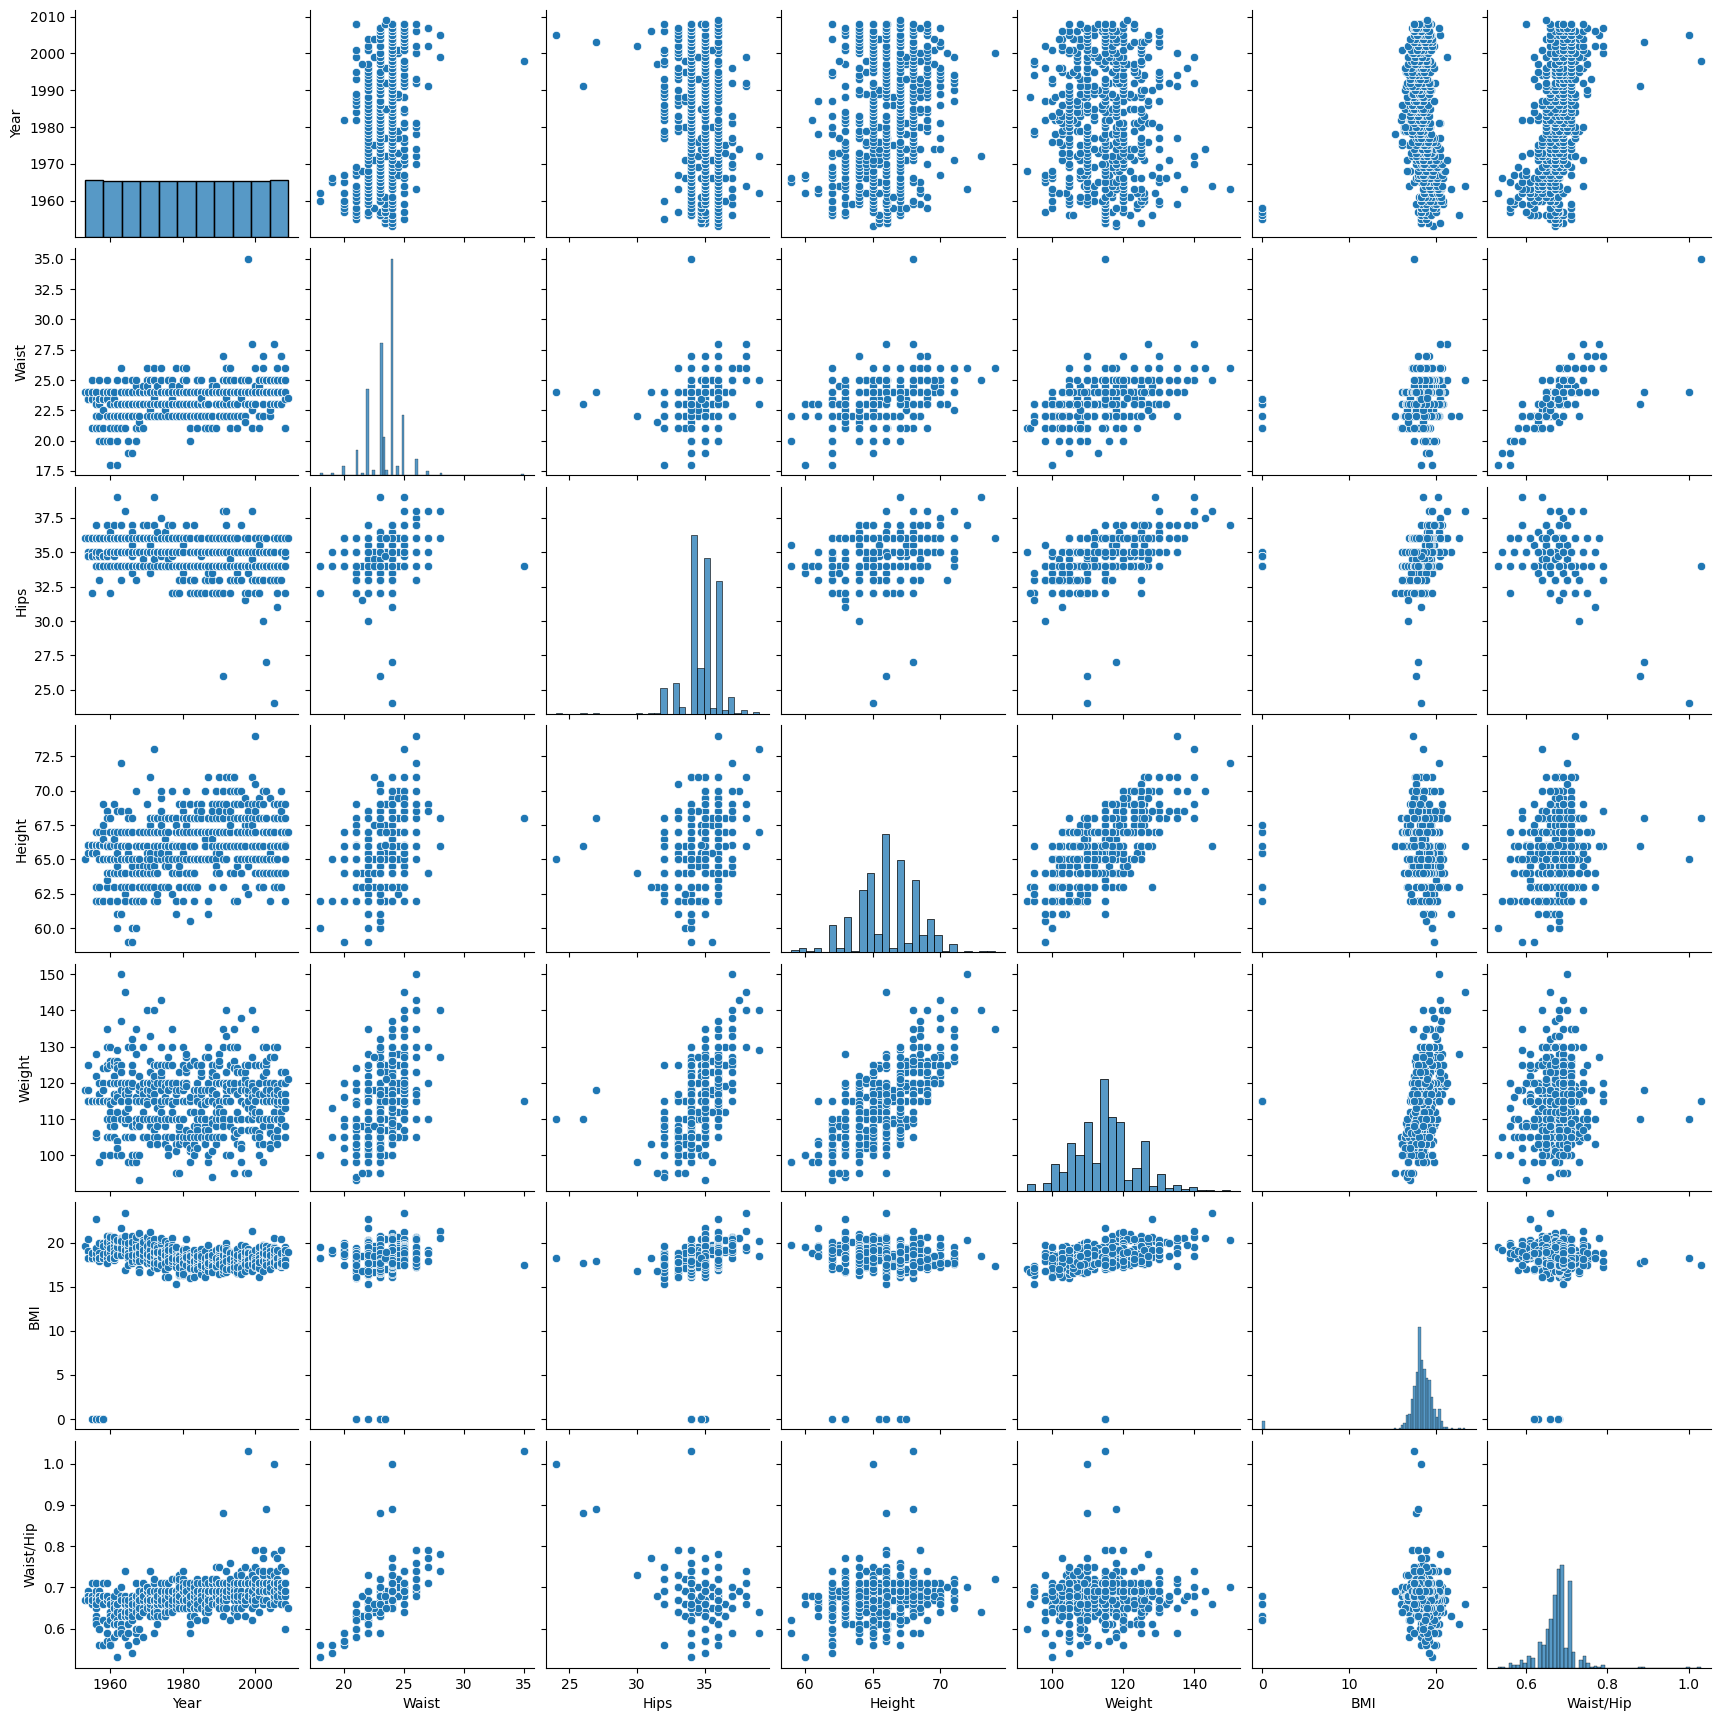

In [22]:
import seaborn as sns
sns.heatmap(data.corr(numeric_only=True), annot=True);
sns.pairplot(data);